# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [0]:
#Import all the necessary modules

import numpy as np
import sklearn
from sklearn import metrics
import pandas as pd
#import pylab as plb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import pickle
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [356]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes+(3).csv to pima-indians-diabetes+(3) (6).csv


In [0]:
import io

In [0]:
pima_df = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes+(3).csv']))

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [359]:
pima_df.head(10)

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [360]:
pima_df.shape

(768, 9)

In [361]:
pima_df.size

6912

In [362]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Preg     768 non-null int64
Plas     768 non-null int64
Pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [363]:
pima_df.iloc[:,0:8].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00


In [364]:
pima_df.columns

Index(['Preg', 'Plas', 'Pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'], dtype='object')

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [0]:
pima_df1 = pima_df

In [366]:
pima_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
Pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [370]:
pima_df1[(pima_df1['Plas'].values==0)==True]

,Preg,Plas,Pres,skin,test,mass,pedi,age,class
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


In [368]:
pima_df1['Plas'].median()

117.0

In [369]:
med = pima_df1.median()
med

Preg       3.0000
Plas     117.0000
Pres      72.0000
skin      23.0000
test      30.5000
mass      32.0000
pedi       0.3725
age       29.0000
class      0.0000
dtype: float64

In [0]:
pima_df1['Plas'] = pima_df1['Plas'].replace(0,np.median(pima_df1['Plas']))
pima_df1['Pres'] = pima_df1['Pres'].replace(0,np.median(pima_df1['Pres']))
pima_df1['skin'] = pima_df1['skin'].replace(0,np.median(pima_df1['skin']))
pima_df1['test'] = pima_df1['test'].replace(0,np.median(pima_df1['test']))
pima_df1['mass'] = pima_df1['mass'].replace(0,np.median(pima_df1['mass']))


In [336]:
pima_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q5 Print the descriptive statistics of each & every column using describe() function

In [337]:
pima_df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Plas,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
Pres,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
skin,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
test,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
mass,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

In [0]:
import seaborn as sns


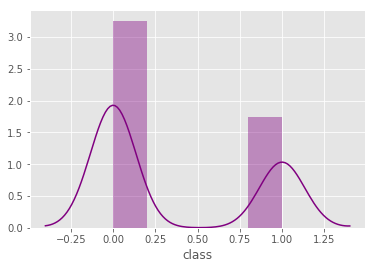

In [339]:
sns.distplot(pima_df1['class'],color='purple')

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


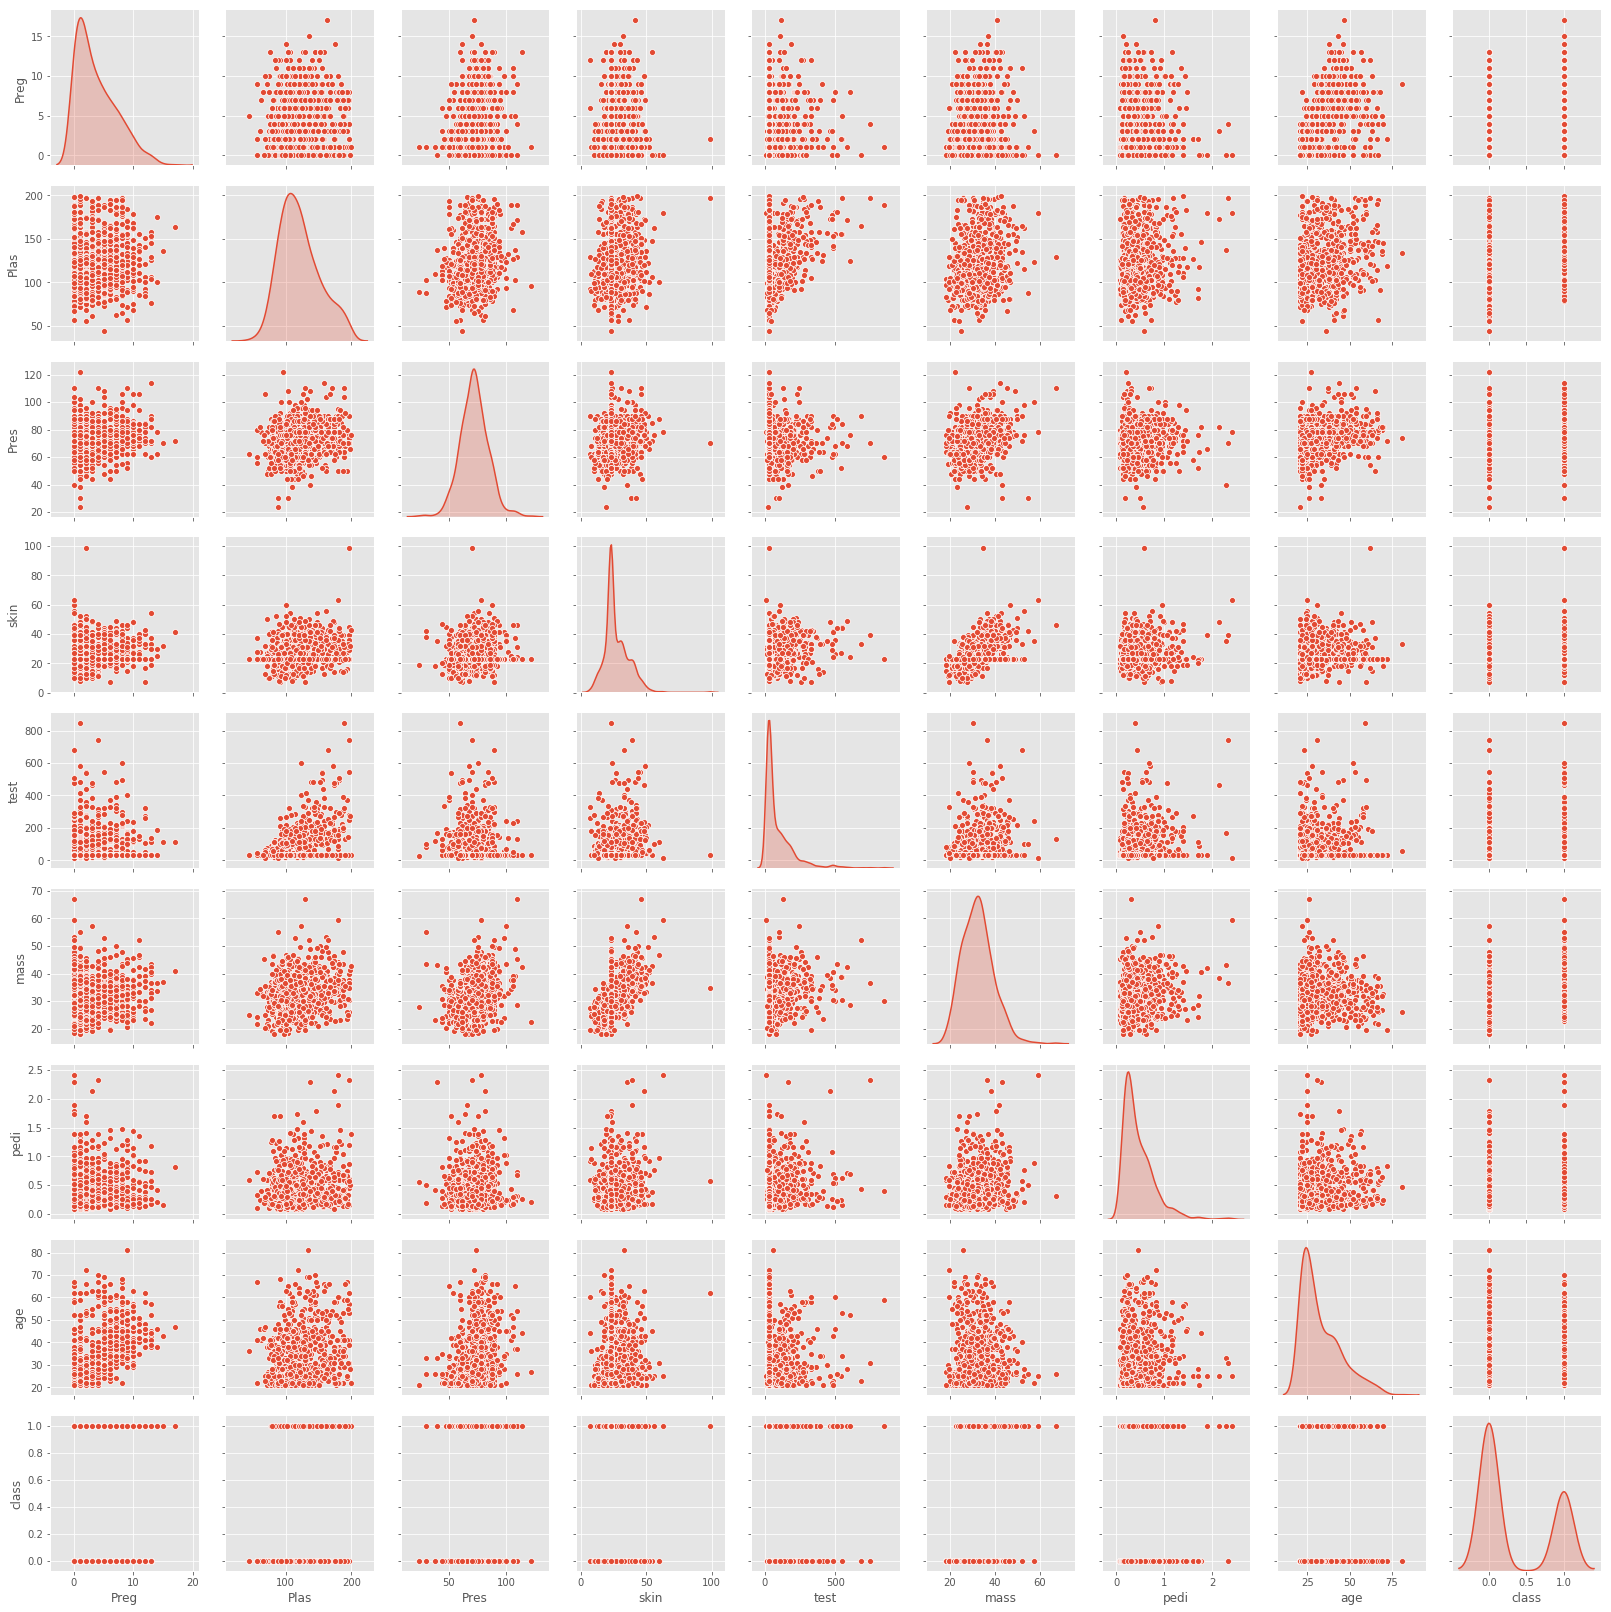

In [341]:
sns.pairplot(pima_df1,diag_kind='kde')

In [0]:
corr = pima_df1.corr()


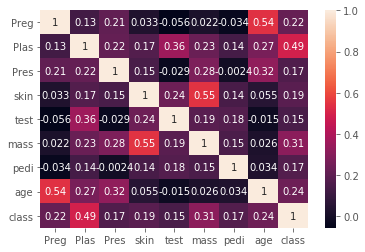

In [344]:
sns.heatmap(corr,annot=True)

Using the plot - infer the relationship between different variables

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [0]:
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.preprocessing import scale


In [0]:
pima_df1 = pima_df1.drop('class',axis=1)

In [0]:

pima_df1_z = pima_df1.apply(scale)

In [0]:
X = np.array(pima_df1_z)

In [0]:
y = np.array(pima_df['class'])

In [0]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.30,random_state=1)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [0]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [0]:
dt_model.score(X_test , y_test)

In [0]:

y_predict = dt_model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

Print the feature importance of the decision model - Optional